#Introdução


Projeto elaborado para estudo,com base no dataset disponibilizado em: https://www.kaggle.com/datasets/mirichoi0218/insurance

Problema de negócio: se faz necessário prever o custo do seguro, dadas certas características da pessoa.

#Pré processamento e análise exploratória dos dados

In [718]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [719]:
# Criando um dicionário auxiliar para criação de dataframe resumo (usado apenas no final do projeto)
resumo={}

In [720]:
# Importando o dataset em formato csv
data=pd.read_csv('caminho do dataset')


In [721]:
#Criando o dataframe
df=data.copy()

In [722]:
# Leitura das instâncias iniciais do dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [723]:
# Extração de informaçoes das variáveis
df.info()

# obs.: sem valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [724]:
# Quantidade de valores únicos por feature
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [725]:
# Sumarização do dataframe
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [726]:
# Verificando valores duplicados
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [727]:
# Dropando os valores duplicados
df=df.drop_duplicates()

In [728]:
# Visualizando a contagem de valores categóricos
print(f'Valores únicos da variável "sexo":\n{df.sex.value_counts()}')
print(f'\nValores únicos da variável "smoker":\n{df.smoker.value_counts()}')

Valores únicos da variável "sexo":
male      675
female    662
Name: sex, dtype: int64

Valores únicos da variável "smoker":
no     1063
yes     274
Name: smoker, dtype: int64


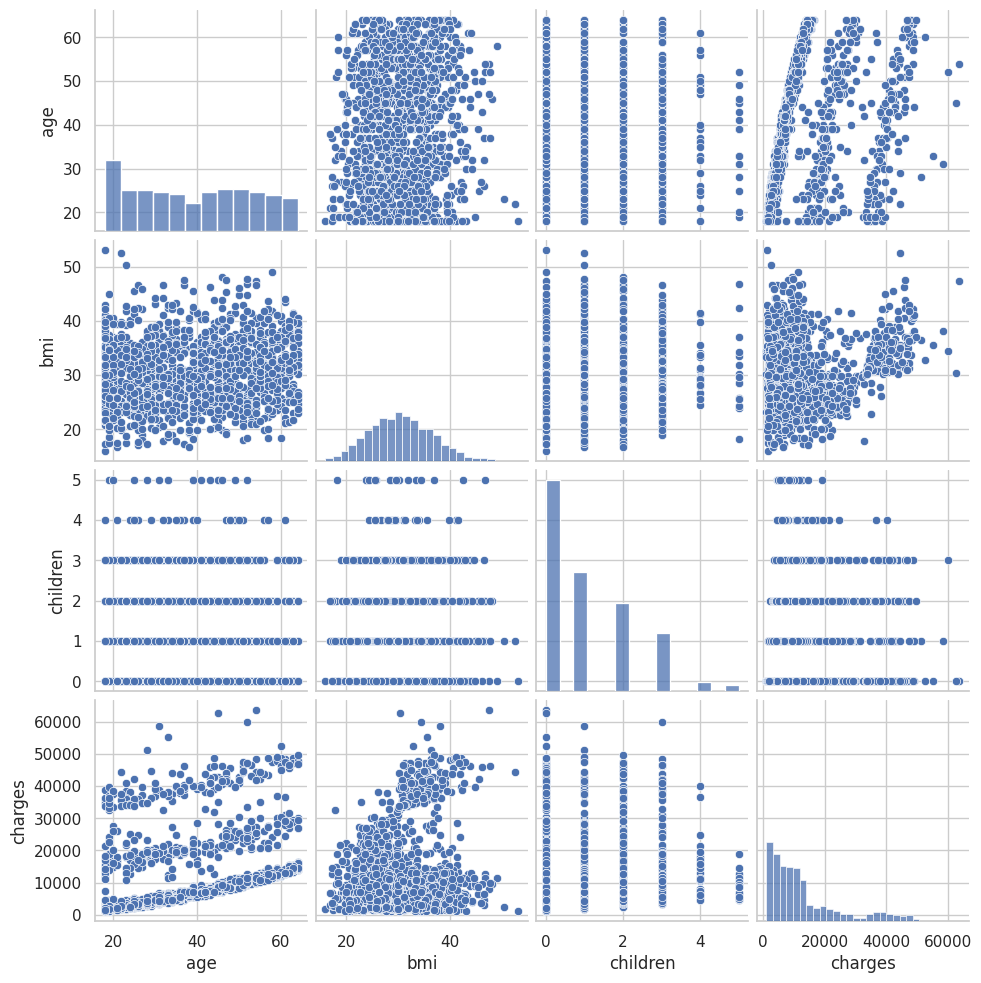

In [729]:
# Gráficos de dispersão em grade entre todas as variáveis
sns.pairplot(df)

<Axes: xlabel='sex', ylabel='count'>

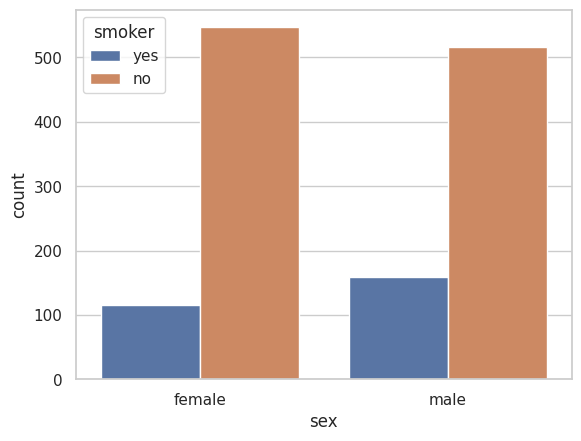

In [730]:
# Análise da distribuição de fumantes em relação ao sexo

sns.countplot(df,x='sex',hue='smoker')

In [731]:
# Verificando a correlação entre as variáveis numéricas
df.corr()

<ipython-input-731-ec65f9a24827>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


#Transformação de variáveis categóricas em numéricas

In [732]:
# Importando a biblioteca
from sklearn.preprocessing import LabelEncoder          # Transforma variáveis categóricas em variáveis numéricas

In [733]:
# Criando o Encoder
le=LabelEncoder()

In [734]:
# Treinando o encoder nas variáveis 'sex' e 'smoker'
var_cat=['sex','smoker']
for i in var_cat:
  aux=i+'_transf'                   #variável auxiliar
  df[aux]=le.fit_transform(df[i])   #criando nova coluna para manter ambas as variáveis (categórica e numérica)

In [735]:
#Verificando as transformações em 5 instâncias aleatórias no dataframe
df[['sex','sex_transf','smoker','smoker_transf']].sample(5)

,sex,sex_transf,smoker,smoker_transf
516,male,1,no,0
1055,male,1,no,0
312,male,1,yes,1
310,male,1,no,0
421,male,1,yes,1


In [736]:
# Mostrando as correlações após a transformação das variáveis categóricas
df.corr()

<ipython-input-736-8f193914801c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges,sex_transf,smoker_transf
age,1.000000,0.109344,0.041536,0.298308,-0.019814,-0.025587
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,0.003746
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.007331
charges,0.298308,0.198401,0.067389,1.000000,0.058044,0.787234
sex_transf,-0.019814,0.046397,0.017848,0.058044,1.000000,0.076596
smoker_transf,-0.025587,0.003746,0.007331,0.787234,0.076596,1.000000


In [737]:
#Criando um backup do dataframe, antes de aplicar nos modelos
df_bkp=df.copy()

#Máquina preditiva (baseline)

In [738]:
# Importando as bibliotecas para predição
from sklearn.model_selection import train_test_split    # Modelo de treino/teste
from sklearn.linear_model import LinearRegression       # Modelo de regressão linear
from sklearn.metrics import r2_score                    # Métrica de avaliação do modelo - Coeficiente de determinação (R²)
from sklearn.metrics import mean_squared_error          # Métrica de avaliaçao do modelo - Raiz do Erro Médio Quadrado (RMSE)

In [739]:
# Criando dados de treino e de teste ('X' maiúsculo, 'y' minúsculo)
X = df.drop(['sex','smoker','charges','region'],axis=1)         #dropanado colunas inutilizáveis.
y = df['charges']                                               #Método reshape: transforma a matriz unidimensional em bidimensional

In [740]:
#Criando o modelo de teste, informando o percentual de dados de teste (geralmente igual a 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Criando o modelo de predição - Regressão linear
model_bl = LinearRegression()

#Passando os dados de treino
model_bl.fit(X_train, y_train)

# Aplicando os dados de teste no modelo e obtendo as predições
y_predict = model_bl.predict(X_test)

In [741]:
# Exibindo comparação entre valor real e valor predito
df_y= pd.DataFrame({'Real': y_test, 'Predito':y_predict.flatten()})

# Exibindo valores aleatórios do dataframe
df_y.sample(5)  

,Real,Predito
1037,39725.51805,33638.549917
198,9644.25250,6532.053053
1318,19496.71917,12084.683569
536,5972.37800,11213.730318
701,9541.69555,16007.761980


In [742]:
# Métricas de avaliação do modelo
mse=mean_squared_error(y_test,y_predict)  #Erro quadrado médio (MSE)
rmse=np.sqrt(mse)                         #Raiz do erro quadrado médio (RMSE)
r2=r2_score(y_test,y_predict)*100         #Coeficiente de determinação (R²)

print(f'''Métricas de avaliação do modelo:\n
RMSE: U$ {rmse:.2f}
  R²: {r2:.1f} %
''')

Métricas de avaliação do modelo:

RMSE: U$ 5669.54
  R²: 75.2 %



In [743]:
# Salvando os ados no dicionário resumo
resumo['baseline']=[r2,rmse]

In [744]:
# Obtendo a equação da reta do modelo de regressão linear
intercepto = model_bl.intercept_
coeficiente = model_bl.coef_
print(f'Equação da reta: Y = {intercepto:.2f} + {coeficiente[0]:.2f}X')

Equação da reta: Y = -13179.22 + 257.45X


#Otimização do modelo (01) - Estratificação dos dados de treinamento

A variável 'smoker_transf' possui alta correlação com o target.
Logo, deseja-se verificar a distribuição de seus valores no dataframe e nos dados de treinamento

In [745]:
# Verificando a estratificação dos dados de treinamento:

# Calculando o percentual de fumantes (yes) e não-fumantes (no) do dataframe
lista1=list(df['smoker'].value_counts())
total1=df['smoker'].count()
yes1=round(lista1[0]/total1*100,2)
no1=round(lista1[1]/total1*100,2)


# Calculando o percentual de fumantes (yes) e não-fumantes (no) do conjunto de treinamento
lista2=list(X_train['smoker_transf'].value_counts())
total2=X_train['smoker_transf'].count()
yes2=round(lista2[0]/total2*100,2)
no2=round(lista2[1]/total2*100,2)


#Criando um quadropara exibição dos valores
quadro=pd.DataFrame({'Rótulo':['Fumante','Não fumante'],'% base':[yes1,no1],'% treino':[yes2,no2]})

quadro

,Rótulo,% base,% treino
0,Fumante,79.51,77.92
1,Não fumante,20.49,22.08


In [746]:
#Recriando o modelo de teste, agora, mantendo a estratificão dos dados de acordo com a variável categórica 'smoker_transf'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=df['smoker_transf'])

# Criando o modelo de predição - Regressão linear
model1 = LinearRegression()

#Passando os dados de treino
model1.fit(X_train, y_train)

# Aplicando os dados de teste no modelo e obtendo as predições
y_predict = model1.predict(X_test)

In [747]:
# Métricas de avaliação do modelo
mse=mean_squared_error(y_test,y_predict)  #Erro quadrado médio (MSE)
rmse=np.sqrt(mse)                         #Raiz do erro quadrado médio (RMSE)
r2=r2_score(y_test,y_predict)*100         #Coeficiente de determinação (R²)

print(f'''Métricas de avaliação do modelo:\n
RMSE: U$ {rmse:.2f}
  R²: {r2:.1f} %
''')

# Houve ligeira piora nos resultados

Métricas de avaliação do modelo:

RMSE: U$ 5834.55
  R²: 74.8 %



In [748]:
# Salvando os ados no dicionário resumo
resumo['modelo 1']=[r2,rmse]

#Otimização do modelo (02) - Criação de nova variável

Será criada uma combinação de variáveis multiplicando o índice de massa corporal pela idade, com o intuito de evidenciar instâncias onde a idade é avançada e índice de massa corporal alto, o que representa, de forma intuitiva, o valor de seguro mais elevado.

var_comb = bmi*age


In [749]:
#Criando a variável
df['var_comb']=df['bmi']*df['age']

In [750]:
# Verificando as correlações com a variável criada
df.corr()

<ipython-input-750-20700e471d06>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges,sex_transf,smoker_transf,var_comb
age,1.000000,0.109344,0.041536,0.298308,-0.019814,-0.025587,0.879702
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,0.003746,0.539920
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.007331,0.042397
charges,0.298308,0.198401,0.067389,1.000000,0.058044,0.787234,0.334184
sex_transf,-0.019814,0.046397,0.017848,0.058044,1.000000,0.076596,0.007179
smoker_transf,-0.025587,0.003746,0.007331,0.787234,0.076596,1.000000,-0.023419
var_comb,0.879702,0.539920,0.042397,0.334184,0.007179,-0.023419,1.000000


In [751]:
# Recriando os dados de treino e de teste ('X' maiúsculo, 'y' minúsculo)
X = df.drop(['sex','smoker','charges','region','age','bmi'],axis=1)         #dropanado colunas inutilizáveis, incluindo 'age' e 'bmi', por serem correlacionadas coma  nova variável
y = df['charges']                                                           #Método reshape: transforma a matriz unidimensional em bidimensional 

In [752]:
#Recriando o modelo de teste, agora, mantendo a estratificão dos dados de acordo com a variável categórica 'smoker_transf'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=df['smoker_transf'])

# Criando o modelo de predição - Regressão linear
model2 = LinearRegression()

#Passando os dados de treino
model2.fit(X_train, y_train)

# Aplicando os dados de teste no modelo e obtendo as predições
y_predict = model2.predict(X_test)

In [753]:
# Métricas de avaliação do modelo
mse=mean_squared_error(y_test,y_predict)  #Erro quadrado médio (MSE)
rmse=np.sqrt(mse)                         #Raiz do erro quadrado médio (RMSE)
r2=r2_score(y_test,y_predict)*100         #Coeficiente de determinação (R²)

print(f'''Métricas de avaliação do modelo:\n
RMSE: U$ {rmse:.2f}
  R²: {r2:.1f} %
''')

# Não foi efetivo

Métricas de avaliação do modelo:

RMSE: U$ 5906.92
  R²: 74.2 %



In [754]:
# Salvando os ados no dicionário resumo
resumo['modelo 2']=[r2,rmse]

#Otimização do modelo (03) - Análise de outliers

Agora, será a analisada a existência de outliers e sua influência na assertividade do modelo

In [755]:
# Restaurando o dataframe original, após limpeza dos dados
df=df_bkp.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_transf,smoker_transf
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


<Axes: >

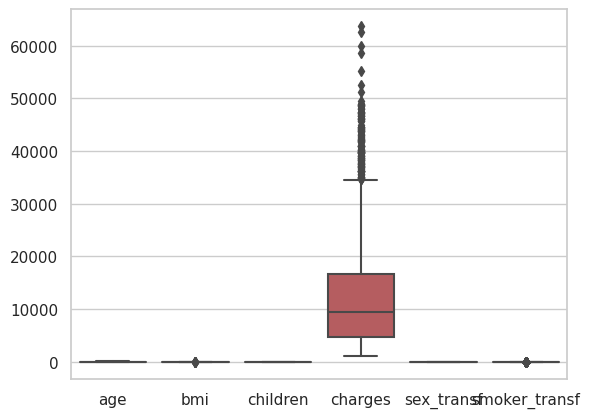

In [756]:
# Visualizando os outliers das variáveis

sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=df)

# Percebe-se que a variável target possui a maior quantidade de outliers.

<Axes: >

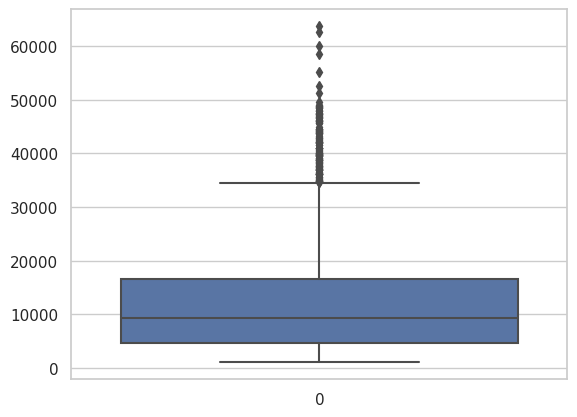

In [757]:
# Visualizando os outliers da variável target

sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=df['charges'])

In [758]:
# Econtrando os limites superior e inferior

# Limite superior = mediana + 2x Desvio Padrão
ls=np.mean(df['charges'])+2*np.std(df['charges'])

# Limite inferior = não se aplica, pois não há outliers nesta direção

In [759]:
# Listando os valores fora dos limites (outliers)
cont=0
for i in df['charges']:
  if i>ls:
    cont=cont+1

print(f'Existem {cont} valores acima do limite superior, o que correponde a {100*cont/df.charges.count():.2f} % dos dados da variável')

#107 valores = 8% dos dados das variáveis. Como se trata de um percentual baixo, as instâncias serão excluídas.

Existem 107 valores acima do limite superior, o que correponde a 8.00 % dos dados da variável


In [760]:
# Deletando os valores além do limite de (X + 2*Sd)
tam_original=list(df.shape)
df=df.drop(df[df['charges']>ls].index)

In [761]:
# Verificando o tamanho do dataframe após a dropagem dos outliers
tam_final=list(df.shape)

print(f'''
      Quantidade de instâncias inicial: {tam_original[0]}
      Quantidade de instâncias final: {tam_final[0]}
      Diferença: -{cont}''')


      Quantidade de instâncias inicial: 1337
      Quantidade de instâncias final: 1230
      Diferença: -107


In [762]:
# Recriando os dados de treino e de teste ('X' maiúsculo, 'y' minúsculo)
X = df.drop(['sex','smoker','charges','region'],axis=1)         #dropanado colunas inutilizáveis.
y = df['charges']                                               #Método reshape: transforma a matriz unidimensional em bidimensional

In [763]:
#Recriando o modelo de teste, agora, mantendo a estratificão dos dados de acordo com a variável categórica 'smoker_transf'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Criando o modelo de predição - Regressão linear
model3 = LinearRegression()

#Passando os dados de treino
model3.fit(X_train, y_train)

# Aplicando os dados de teste no modelo e obtendo as predições
y_predict = model3.predict(X_test)

In [764]:
# Métricas de avaliação do modelo
mse=mean_squared_error(y_test,y_predict)  #Erro quadrado médio (MSE)
rmse=np.sqrt(mse)                         #Raiz do erro quadrado médio (RMSE)
r2=r2_score(y_test,y_predict)*100         #Coeficiente de determinação (R²)

print(f'''Métricas de avaliação do modelo:\n
RMSE: U$ {rmse:.2f}
  R²: {r2:.1f} %
''')

# Não foi efetivo em relação ao R2, apesar de reduzir o RMSE

Métricas de avaliação do modelo:

RMSE: U$ 4938.20
  R²: 58.1 %



In [765]:
# Salvando os ados no dicionário resumo
resumo['modelo 3']=[r2,rmse]

#Conclusões

As tentativas de otimização do modelo não demonstraram eficiência em relação ao baseline. Sendo assim, otou-se pelo modelo inicial, com Coeficiente de Determinação próximo a 75% e RMSE próxima a U$ 5600.00

In [766]:
# Quadro resumo

#Cria o dataframe
quadro_resumo=pd.DataFrame(resumo)

#Transpõe o dataframe                                      
quadro_resumo=quadro_resumo.T

#Renomeia as keys
quadro_resumo=quadro_resumo.rename(columns={0:'R² (%)',1:'RMSE (U$)'})  

# definir estilo com bordas no índice e todas as células
quadro_resumo = quadro_resumo.style.set_table_styles([{'selector': 'th','props': [('border', '2px solid black')]}])
quadro_resumo = quadro_resumo.set_properties(**{'border': '2px solid black'})

# definir estilo com barras de cores
quadro_resumo = quadro_resumo.bar(subset=['R² (%)'], color='#d65f5f',vmin=50,vmax=85)
quadro_resumo = quadro_resumo.bar(subset=['RMSE (U$)'], color='green',vmin=1000,vmax=7000)

quadro_resumo

,R² (%),RMSE (U$)
baseline,75.151748,5669.537447
modelo 1,74.837530,5834.548677
modelo 2,74.209465,5906.916162
modelo 3,58.054322,4938.203163


#Predição de novos valores

Os valores a serem preditos serão baseados no modelo baseline

In [767]:
# Input de novos dados de entrada para a previsão (um valor para cada variável)
age=30          #idade
kg=74           #peso
h=1.70          #altura
bmi=kg/(h**2)   #IMC
children = 0    #Quantidade de filhos
sex = 1         #Sexo: 0 para 'feminino, 1 para 'masculino'
smoker=0        #Fumante? 0 para 'não', 1 para 'sim'

# Criando lista com os valores das variáveis
lista = [age, bmi, children,sex,smoker]

valor_array=np.array(lista).reshape(1, -1)
valor = model_bl.predict(valor_array)
valor=int(valor)
print(f'\n\nPrevisão de valor do seguro com base nos dados informados: U$ {valor:.2f}\n\n')



Previsão de valor do seguro com base nos dados informados: U$ 3369.00




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
